In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
path = '../../All_data_sets/model_data_set/linear_regression/economic_dataset.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [6]:
df.drop(columns=['year', 'month','Unnamed: 0'] , inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
df.shape

(24, 3)

### Pair plot

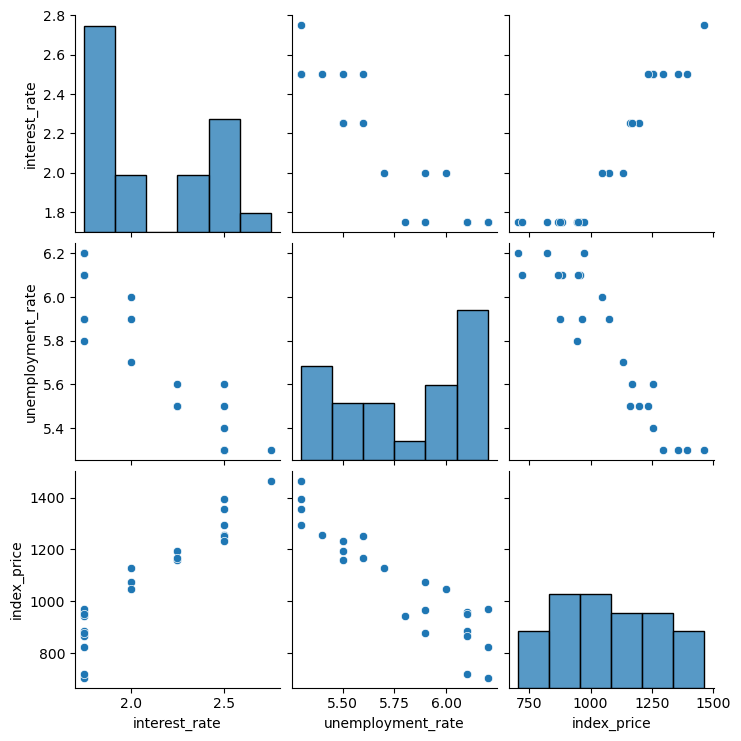

In [9]:
sns.pairplot( df )
plt.show()

In [10]:
corr = df.corr()
corr

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


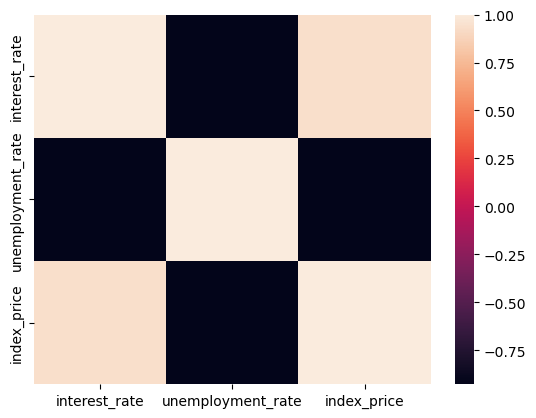

In [11]:

sns.heatmap(corr)
plt.show()

In [12]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

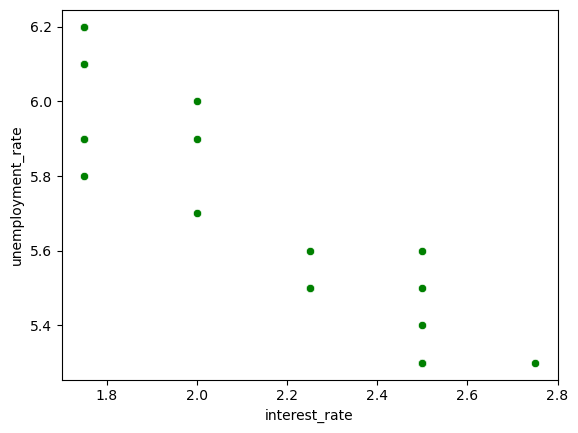

In [13]:


sns.scatterplot(x=df['interest_rate'] , y=df['unemployment_rate'] , color='g')

plt.show()

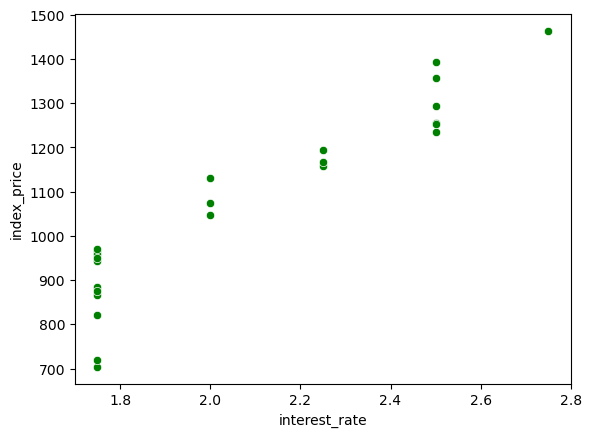

In [14]:


sns.scatterplot(x=df['interest_rate'] , y=df['index_price'] , color='g')

plt.show()

### spliting dataset into independent and dependent features

In [15]:
X = df.iloc[ : , : -1 ]

y = df.iloc[ : , -1]

#### train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split( X,y , train_size=0.25 , random_state=42 )

<Axes: xlabel='interest_rate', ylabel='index_price'>

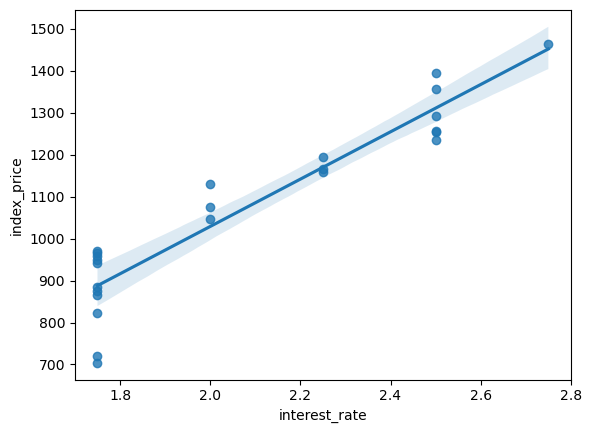

In [18]:
sns.regplot( x = df['interest_rate'] , y=df['index_price'] )

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

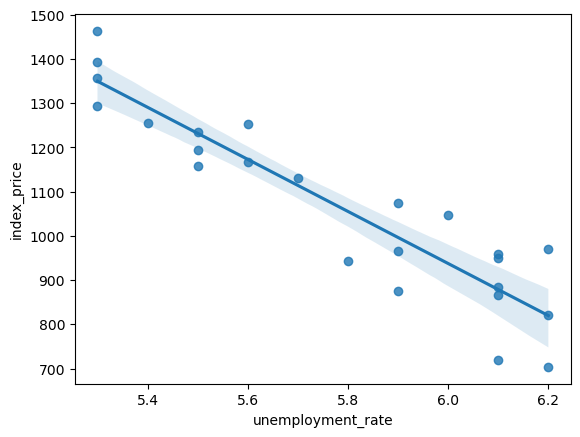

In [19]:
sns.regplot( x = df['unemployment_rate'] , y=df['index_price'] )

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit( X_train , y_train )

LinearRegression()

### Validation

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
validation_score = cross_val_score(
    estimator=model ,
    X=X_train , 
    y = y_train,scoring='neg_root_mean_squared_error',
    cv=4
)

print( validation_score )

[-104.03824737  -58.69166726 -136.25925926  -40.44444444]


In [28]:
validation_score.mean()

-84.85840458332812

In [29]:
y_pred = model.predict( X_test )

In [30]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [31]:
mse = mean_squared_error( y_test , y_pred )

rmse = np.sqrt( mse )

mae = mean_absolute_error(  y_test , y_pred  )

In [32]:
print(f'Mean squared error: {mse}')

print(f'Root mean squared error: {rmse}')

print(f'Mean absolute error: {mae}')

Mean squared error: 10682.50509868587
Root mean squared error: 103.35620493558125
Mean absolute error: 89.97791862049174


In [33]:
from sklearn.metrics import r2_score

In [34]:
r_2_score = r2_score( y_test , y_pred )

print(f'r_2_score: {r_2_score}')

r_2_score: 0.7560187688535143


In [35]:
point = scaler.transform( [[ 2.71 , 5.3 ]] )


print(f'The Predicted value:{model.predict( point )[0]}')

The Predicted value:1276.9685095815296


In [36]:
residules = y_test - y_pred

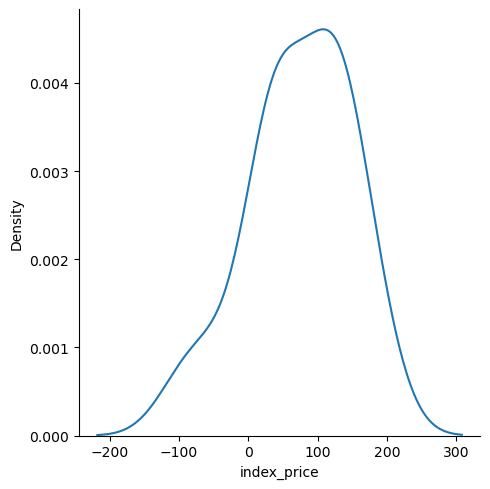

In [37]:
sns.displot(residules , kind='kde')

plt.show()

In [39]:
model.coef_

array([  34.69626498, -147.77156853])

In [40]:
model.intercept_

1014.4999999999994